In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
# df2 = pd.read_csv("../csv/move.csv", sep=';', index_col="id")
connection = sqlite3.connect("../output/db/bulk_analysis_2019-11-08_1000ms.db")
cursor = connection.cursor()
df = pd.read_sql("SELECT * FROM move", connection)
df.head()

,id,fullmove_number,ply_number,turn,san,lan,score,score_change,score_change_category,move_count,...,guarded_pieces_centipawn_all,attacked_guarded_pieces_centipawn_all,unopposed_threats_centipawn_all,threats_centipawn_all,attack_defense_relation1,attack_defense_relation2,material,pawn_ending,rook_ending,game_id
0,1,1,1,1,d4,d2-d4,-10,10,0.20,20,...,5800,0,0,0,0,-600,0,0,0,1
1,2,1,2,0,g6,g7-g6,118,128,2.56,20,...,5800,0,0,0,0,-500,0,0,0,1
2,3,2,3,1,c4,c2-c4,37,81,1.62,28,...,5700,0,0,0,0,-1500,0,0,0,1
3,4,2,4,0,Bg7,Bf8-g7,106,69,1.38,21,...,5900,100,0,0,600,-2100,0,0,0,1
4,5,3,5,1,Nf3,Ng1-f3,43,63,1.26,30,...,5900,100,0,0,900,-1300,0,0,0,1


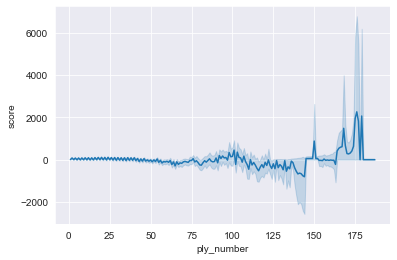

In [23]:
sns.set_style("darkgrid")
ax = sns.lineplot(x="ply_number", y="score", data=df)


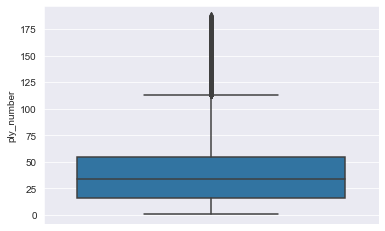

In [30]:

boxplot = sns.boxplot(y=df["ply_number"])


In [31]:
df.ply_number.describe()


count    62355.000000
mean        38.776955
std         28.321999
min          1.000000
25%         16.000000
50%         34.000000
75%         55.000000
max        187.000000
Name: ply_number, dtype: float64

ValueError: could not broadcast input array from shape (62355) into shape (989)

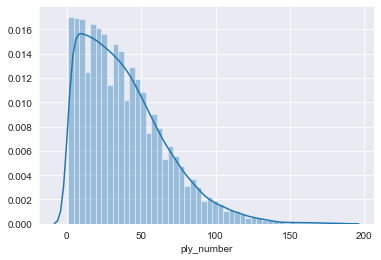

In [36]:

scatterplot = sns.distplot(df["ply_number"])


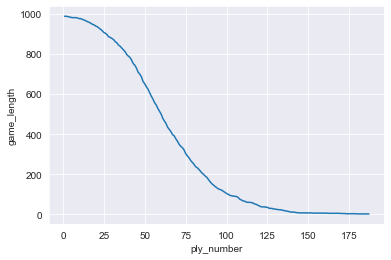

In [67]:
game_length = df.groupby("ply_number").count().sort_values(by=["id"]).id
df_game_length = pd.read_sql("SELECT ply_number, COUNT(*) as game_length FROM move GROUP BY ply_number ORDER BY game_length DESC", connection)
line = sns.lineplot(x=df_game_length["ply_number"], y=df_game_length["game_length"], sort=True)

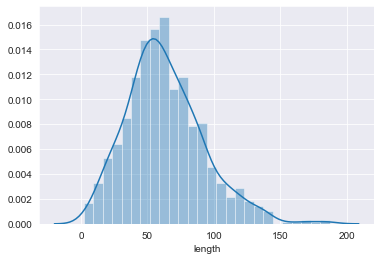

In [71]:

df_game = pd.read_sql("SELECT * FROM game", connection)
sns.distplot(df_game["length"])

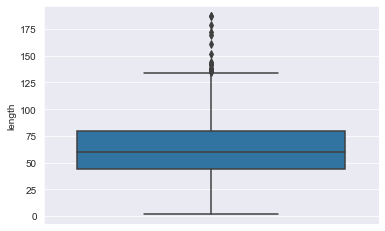

In [72]:

sns.boxplot(y=df_game["length"])


In [104]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print(fence_low, fence_high)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df_clean = remove_outlier(df, "ply_number")

print(df_clean)


-42.5 113.5
          id  fullmove_number  ply_number  turn   san      lan  score  \
0          1                1           1     1    d4    d2-d4    -10   
1          2                1           2     0    g6    g7-g6    118   
2          3                2           3     1    c4    c2-c4     37   
3          4                2           4     0   Bg7   Bf8-g7    106   
4          5                3           5     1   Nf3   Ng1-f3     43   
...      ...              ...         ...   ...   ...      ...    ...   
62342  62343               55         109     1   Qd6   Qb8-d6      0   
62343  62344               55         110     0   Kf5   Kg5-f5      0   
62344  62345               56         111     1  Qg6+  Qd6-g6+      0   
62345  62346               56         112     0   Kf4   Kf5-f4      0   
62346  62347               57         113     1    h7    h6-h7      0   

       score_change  score_change_category  move_count  ...  \
0                10                   0.20      

In [106]:
print(df_game)


      id                                              event  \
0      1  Rated Bullet tournament https://lichess.org/to...   
1      2  Rated Bullet tournament https://lichess.org/to...   
2      3                                  Rated Bullet game   
3      4                                   Rated Blitz game   
4      5                                   Rated Rapid game   
..   ...                                                ...   
984  985                                   Rated Blitz game   
985  986                                   Rated Blitz game   
986  987                               Rated Classical game   
987  988                               Rated Classical game   
988  989                                  Rated Bullet game   

                             site        date round             white  \
0    https://lichess.org/W3lY5C2s  2018-12-31     -          DANIEL76   
1    https://lichess.org/WAmucdBK  2018-12-31     -       Freddy19980   
2    https://lichess.org

In [107]:

df_game_clean = remove_outlier(df_game, "length")
print(df_game_clean)


-10.0 134.0
      id                                              event  \
0      1  Rated Bullet tournament https://lichess.org/to...   
1      2  Rated Bullet tournament https://lichess.org/to...   
2      3                                  Rated Bullet game   
3      4                                   Rated Blitz game   
4      5                                   Rated Rapid game   
..   ...                                                ...   
984  985                                   Rated Blitz game   
985  986                                   Rated Blitz game   
986  987                               Rated Classical game   
987  988                               Rated Classical game   
988  989                                  Rated Bullet game   

                             site        date round             white  \
0    https://lichess.org/W3lY5C2s  2018-12-31     -          DANIEL76   
1    https://lichess.org/WAmucdBK  2018-12-31     -       Freddy19980   
2    https:/

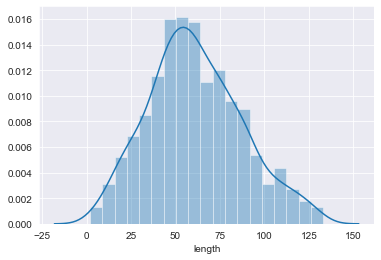

In [108]:

sns.distplot(df_game_clean["length"])


In [109]:

df_move_clean = df[df["game_id"].isin(df_game_clean["id"])]
print(df_move_clean)

          id  fullmove_number  ply_number  turn   san     lan  score  \
0          1                1           1     1    d4   d2-d4    -10   
1          2                1           2     0    g6   g7-g6    118   
2          3                2           3     1    c4   c2-c4     37   
3          4                2           4     0   Bg7  Bf8-g7    106   
4          5                3           5     1   Nf3  Ng1-f3     43   
...      ...              ...         ...   ...   ...     ...    ...   
62350  62351               59         117     1   Qg4  Qg6-g4      0   
62351  62352               59         118     0   Ke3  Kf2-e3      0   
62352  62353               60         119     1   Qf8  Qh8-f8      0   
62353  62354               60         120     0   Kd2  Ke3-d2      0   
62354  62355               61         121     1  Qff3  Qf8-f3      0   

       score_change  score_change_category  move_count  ...  \
0                10                   0.20          20  ...   
1        

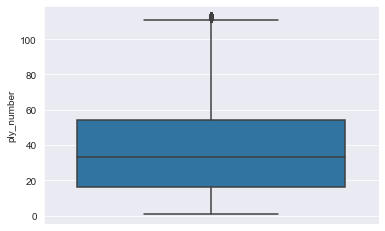

In [87]:
boxplot = sns.boxplot(y=df_clean["ply_number"])

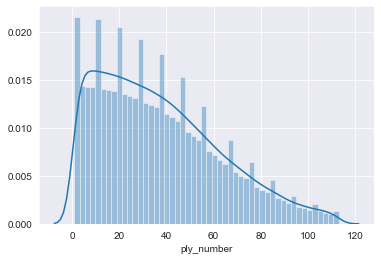

In [88]:
scatterplot = sns.distplot(df_clean["ply_number"])

In [89]:
from scipy import stats
z = np.abs(stats.zscore(df["ply_number"]))

threshold = 3
print(np.where(z > 3))


(array([ 3764,  3765,  3766,  3767,  3768,  3769,  3770,  3771,  3772,
        3773,  3774,  3775,  3776,  3777,  3778,  3779,  4477,  4478,
        4692,  4693,  4694,  4695,  4696,  4697,  4698,  4699,  4700,
        4701,  4702,  7851,  7852,  7853,  7854,  7855,  7856,  7857,
        7858,  7859,  7860,  7861,  9643,  9644, 12051, 12052, 12053,
       12054, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12062,
       12063, 12064, 12065, 12066, 12067, 12068, 12069, 12070, 12071,
       12072, 12073, 12074, 12075, 12076, 12077, 12078, 12079, 16235,
       16236, 16237, 16238, 16239, 17431, 17682, 17683, 17684, 17685,
       17686, 17687, 17688, 17689, 17690, 17691, 17692, 17693, 17694,
       17695, 17696, 17697, 17698, 17699, 18538, 18539, 18540, 18541,
       18542, 18543, 18544, 18545, 18546, 18547, 18548, 18549, 18550,
       18551, 18552, 18553, 18554, 18555, 18556, 18557, 18558, 18559,
       18560, 18561, 18562, 18563, 18564, 18565, 18566, 18567, 18568,
       18569, 18570

In [93]:
df_clean.groupby("game_id").ply_number.max()

game_id
1       68
2      113
3       81
4       66
5       23
      ... 
985     86
986     56
987     53
988     45
989    113
Name: ply_number, Length: 989, dtype: int64

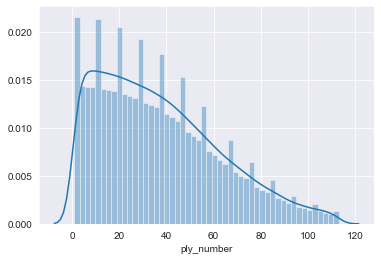

In [94]:
scatterplot = sns.distplot(df_clean["ply_number"])


In [97]:

df_game_length_clean = remove_outlier(df_game_length, "game_length")
print(df_game_length_clean)

     ply_number  game_length
0             1          989
1             2          989
2             3          987
3             4          986
4             5          983
..          ...          ...
182         183            2
183         184            2
184         185            2
185         186            2
186         187            2

[187 rows x 2 columns]


In [ ]:
line = sns.lineplot(x=df_game_length_clean["ply_number"], y=df_game_length_clean["game_length"], sort=True)

SELECT * 
FROM move 
WHERE id 
IN (3764,  3765,  3766,  3767,  3768,  3769,  3770,  3771,  3772,
        3773,  3774,  3775,  3776,  3777,  3778,  3779,  4477,  4478,
        4692,  4693,  4694,  4695,  4696,  4697,  4698,  4699,  4700,
        4701,  4702,  7851,  7852,  7853,  7854,  7855,  7856,  7857,
        7858,  7859,  7860,  7861,  9643,  9644, 12051, 12052, 12053,
       12054, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12062,
       12063, 12064, 12065, 12066, 12067, 12068, 12069, 12070, 12071,
       12072, 12073, 12074, 12075, 12076, 12077, 12078, 12079, 16235,
       16236, 16237, 16238, 16239, 17431, 17682, 17683, 17684, 17685,
       17686, 17687, 17688, 17689, 17690, 17691, 17692, 17693, 17694,
       17695, 17696, 17697, 17698, 17699, 18538, 18539, 18540, 18541,
       18542, 18543, 18544, 18545, 18546, 18547, 18548, 18549, 18550,
       18551, 18552, 18553, 18554, 18555, 18556, 18557, 18558, 18559,
       18560, 18561, 18562, 18563, 18564, 18565, 18566, 18567, 18568,
       18569, 18570, 18571, 18572, 18573, 18574, 18575, 18576, 18577,
       18578, 18579, 18580, 18581, 18582, 18583, 20963, 20964, 20965,
       20966, 20967, 20968, 20969, 20970, 20971, 20972, 20973, 20974,
       22299, 22300, 22301, 22302, 22303, 22304, 22305, 22306, 22307,
       22308, 22309, 22310, 22311, 22312, 22313, 22314, 22315, 22316,
       22317, 22318, 22319, 22320, 22321, 22322, 22323, 22324, 22325,
       22326, 22327, 22328, 22329, 22330, 22331, 22332, 22333, 22334,
       22335, 22336, 22337, 22338, 22339, 22340, 22341, 22342, 22343,
       22344, 22345, 22346, 22347, 22348, 22349, 22350, 22351, 22352,
       22353, 22354, 22355, 22356, 22357, 22358, 22359, 22360, 22361,
       22362, 24569, 24570, 24571, 24572, 24573, 24574, 24575, 24576,
       24577, 24578, 25475, 25476, 25477, 25478, 25479, 25480, 25481,
       25482, 25483, 25484, 25485, 25486, 25487, 25488, 25489, 25490,
       25491, 25492, 25493, 25494, 25495, 25496, 25497, 25498, 25499,
       25500, 25501, 25502, 25503, 25504, 25505, 25506, 25507, 25508,
       25509, 25510, 25511, 25512, 25513, 25514, 25515, 25516, 25517,
       25518, 25519, 25520, 25521, 25522, 25523, 27014, 27015, 27016,
       27017, 27018, 29082, 29083, 29084, 29085, 29086, 29087, 29088,
       29089, 29090, 29091, 29092, 29093, 29094, 29095, 29096, 29220,
       29221, 29222, 29223, 29224, 29225, 29226, 29227, 29228, 29229,
       31756, 31757, 31758, 31759, 31760, 31761, 31762, 31763, 31764,
       31765, 31766, 31767, 31768, 31769, 32235, 32236, 32605, 32606,
       32607, 32608, 32609, 32610, 32611, 32612, 36262, 36263, 36264,
       36265, 36266, 36267, 36268, 36269, 36270, 36271, 36272, 36273,
       36274, 36275, 36591, 36592, 36593, 36594, 36595, 36596, 36597,
       36598, 36599, 36600, 36601, 36602, 36603, 36604, 36605, 36606,
       36607, 36608, 36609, 36610, 36611, 41276, 41277, 41480, 41481,
       41482, 41483, 41484, 41485, 41486, 41487, 41488, 41489, 41490,
       41491, 41492, 41493, 41494, 41495, 41496, 41497, 41498, 41499,
       41500, 41501, 41502, 41503, 41504, 41505, 41506, 41507, 41508,
       41509, 41510, 41511, 41512, 41513, 41514, 41515, 41516, 41517,
       41740, 41741, 41742, 41743, 41744, 41745, 41746, 41971, 41972,
       41973, 41974, 45189, 45190, 45191, 45192, 45193, 45194, 45195,
       45196, 45197, 45198, 45199, 45200, 45201, 45202, 45203, 45204,
       45205, 45206, 45207, 46986, 46987, 46988, 46989, 46990, 46991,
       46992, 46993, 46994, 46995, 46996, 46997, 46998, 46999, 47000,
       47314, 47315, 47316, 47317, 47318, 47319, 47320, 47321, 47322,
       47323, 47324, 47325, 47326, 52743, 52744, 52745, 52746, 52747,
       52748, 52749, 52750, 52751, 52752, 52753, 52754, 52755, 52756,
       52757, 52758, 52759, 52760, 52761, 53592, 53593, 53594, 53595,
       53596, 53597, 53598, 53599, 53600, 53601, 53602, 53603, 53604,
       53605, 53606, 53607, 53608, 53609, 53610, 53611, 53612, 53613,
       53614, 53615, 53616, 53617, 53618, 53619, 53620, 53621, 53622,
       53623, 53624, 53625, 53626, 53627, 53628, 53629, 53630, 53631,
       53632, 53633, 53634, 53635, 53636, 53637, 53638, 53639, 53640,
       53641, 53642, 53643, 53644, 53645, 53646, 53647, 53648, 53649,
       53650, 53651, 53652, 53653, 53654, 53655, 55802, 55803, 55804,
       55805, 55806, 56372, 56373, 58679, 58680, 58681, 58682, 58683,
       58684, 58685, 58686, 58687, 58688, 58689, 58690, 58691, 58692,
       58693, 58694, 58695, 58696, 58697, 58698, 58699, 58700, 58701,
       58702, 58703, 58704, 58705, 58706, 58707, 58708, 58709, 58710,
       58711, 58712, 58713, 58714, 58715, 58716, 58717, 58718, 58719,
       58720, 58721, 58722, 58723, 58724, 58725, 58726, 58727, 58728,
       58729, 58730, 58731, 58732, 58733, 58734, 59564, 59565, 59566,
       59567, 59568, 59569, 59570, 59845, 59846, 59847, 59848, 59849,
       59850, 59851, 59852, 59853, 59854, 59855, 59856)
ORDER BY ply_number ASC;